**BASE DE DATOS:**

Se ha elgido una base de datos llamada *iris*. En ella se analizan los datos de 3 tipo de flores: la longitud y ancho de los petalos y la longitud y ancho de los sepalos (*petal_length, petal_width, sepal_length, sepal_width*). Estos van asociados a una columna llamada *class*, donde se especifica el tipo de flor. Además se han creado dos colummnas mas con valores categóricos1. Una llamada color donde se assigna uno de entre 4 colores en funcion de *sepal_length*; y otra llamada *size*, donde se assigna big, medium o small en funcion de *petal_length*.

La estructura final es la siguiente:

*petal_length - petal_width - sepal_length - sepal_width - class - color - size*

1: Las columnas adicionales se han añadido en MySQL para mantener la consisténcia en el ejercicio, representando que se han de exportar todos los datos desde una base de datos de MySQL.

UPDATE iris
SET color = 
    CASE
        WHEN sepal_length < 4 THEN 'red'
        WHEN sepal_length < 5 THEN 'pink'
        WHEN sepal_length < 6 THEN 'blue'
        WHEN sepal_length < 7 THEN 'green'
        ELSE 'orange'
    END;

UPDATE iris
SET size = 
    CASE
        WHEN petal_length < 4.1 THEN 'small'
        WHEN petal_length > 5.1 THEN 'big'
        ELSE 'medium'
    END;

#### **NIVEL 1**

EX1

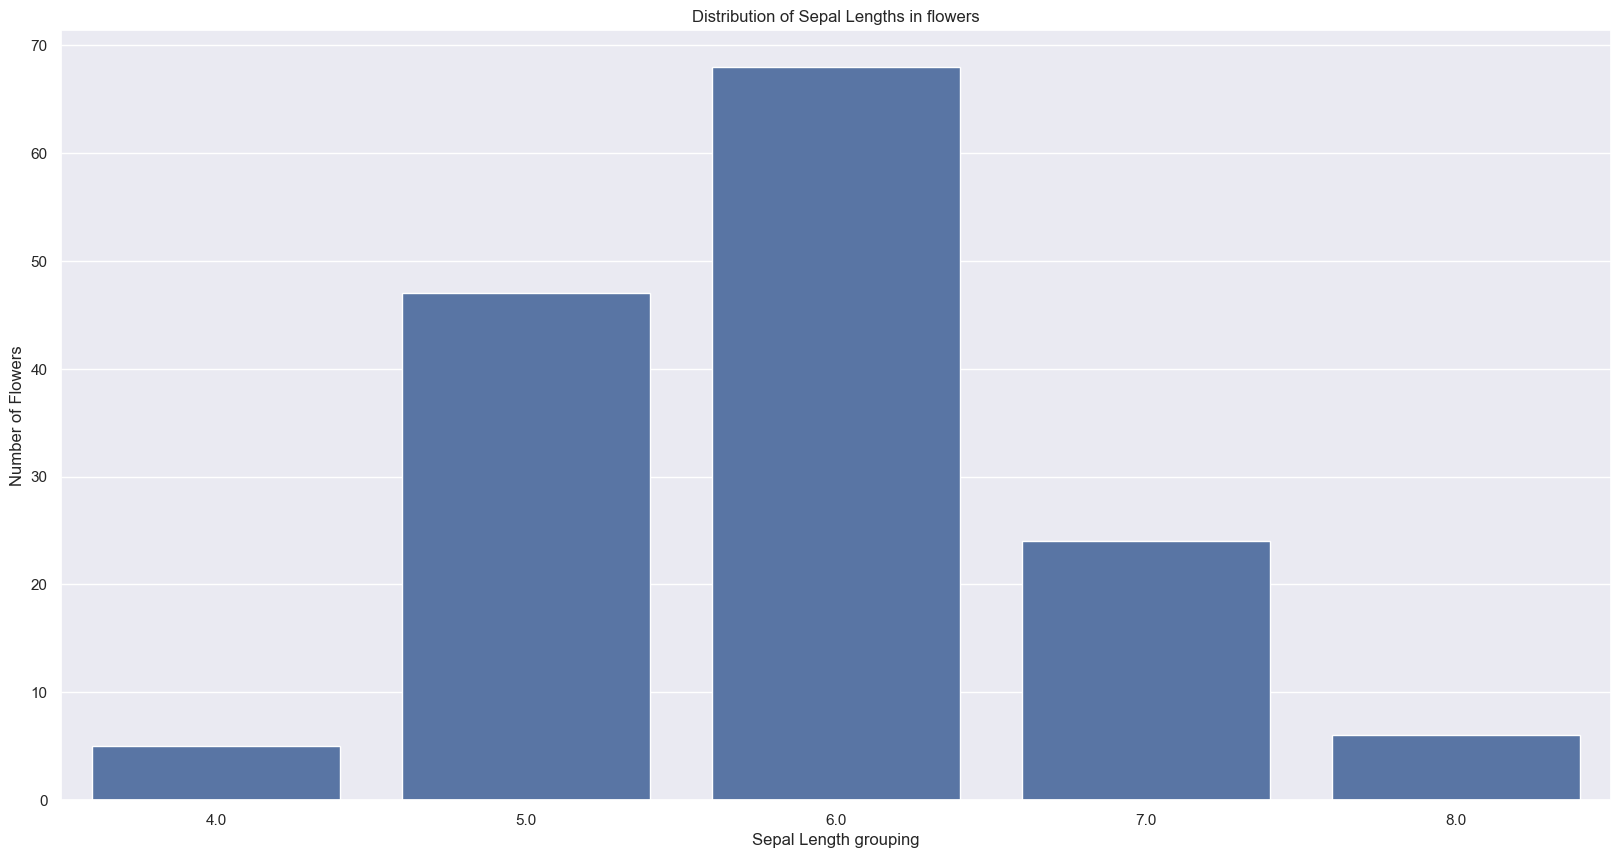

In [20]:
#Primero importamos las librerias que nos interesan
import mysql.connector #Para realizar la conexion con MySQL
import pandas as pd #Pandas para tratar los datos
import seaborn as sns #Seaborn y Matplotlib para realizar plots con los datos
import matplotlib.pyplot as plt

#Conectamos con MySQL, especificamos la base de datos con la que queremos trabajar.
conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

#Almacenamos el query y lo ejecutamos con cursor.
query = "SELECT COUNT(ROUND(sepal_length, 0)), ROUND(sepal_length, 0) FROM iris GROUP BY ROUND(sepal_length, 0)"
cursor = conn.cursor()
cursor.execute(query)

#Cojemos los datos que acabamos de rescatar de MySQL montamos el dataframe de pandas. Con un bucle for recorremos los datos para cojer el primer valor como nombre de las columnas para montar el dataframe
data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

#Montamos el plot que nos interesa, especificando el dataframe de pandas que acabamos de montar con los datos extraidos de MySQL y que datos queremos representar.
sns.barplot(data=df, x='ROUND(sepal_length, 0)', y='COUNT(ROUND(sepal_length, 0))')
#Con Matplotlib podemos cambiar el titulo, nombre de los ejes, etc...
plt.title("Distribution of Sepal Lengths in flowers")
plt.xlabel("Sepal Length grouping")
plt.ylabel("Number of Flowers")
plt.show()

cursor.close()
conn.close()

Ex1: Una Variable Numérica:

Se ha elegido *sepal_length*. Se ha graficado un barplot con y = Count x = *sepal_length*. Se ha redondeado para que se creen grupos mas unifromes, de esta forma se puede apreciar una distribución normal de los datos, con los valores mas extremos siendo menos prevalientes que los valores medios. Se podria haver graficado cualquiera de las otras tres variables numéricas *petal_length, petal_width, sepal_width* y se esperarian resultados similares, con los valores medios siendo los mas abundantes.

EX2

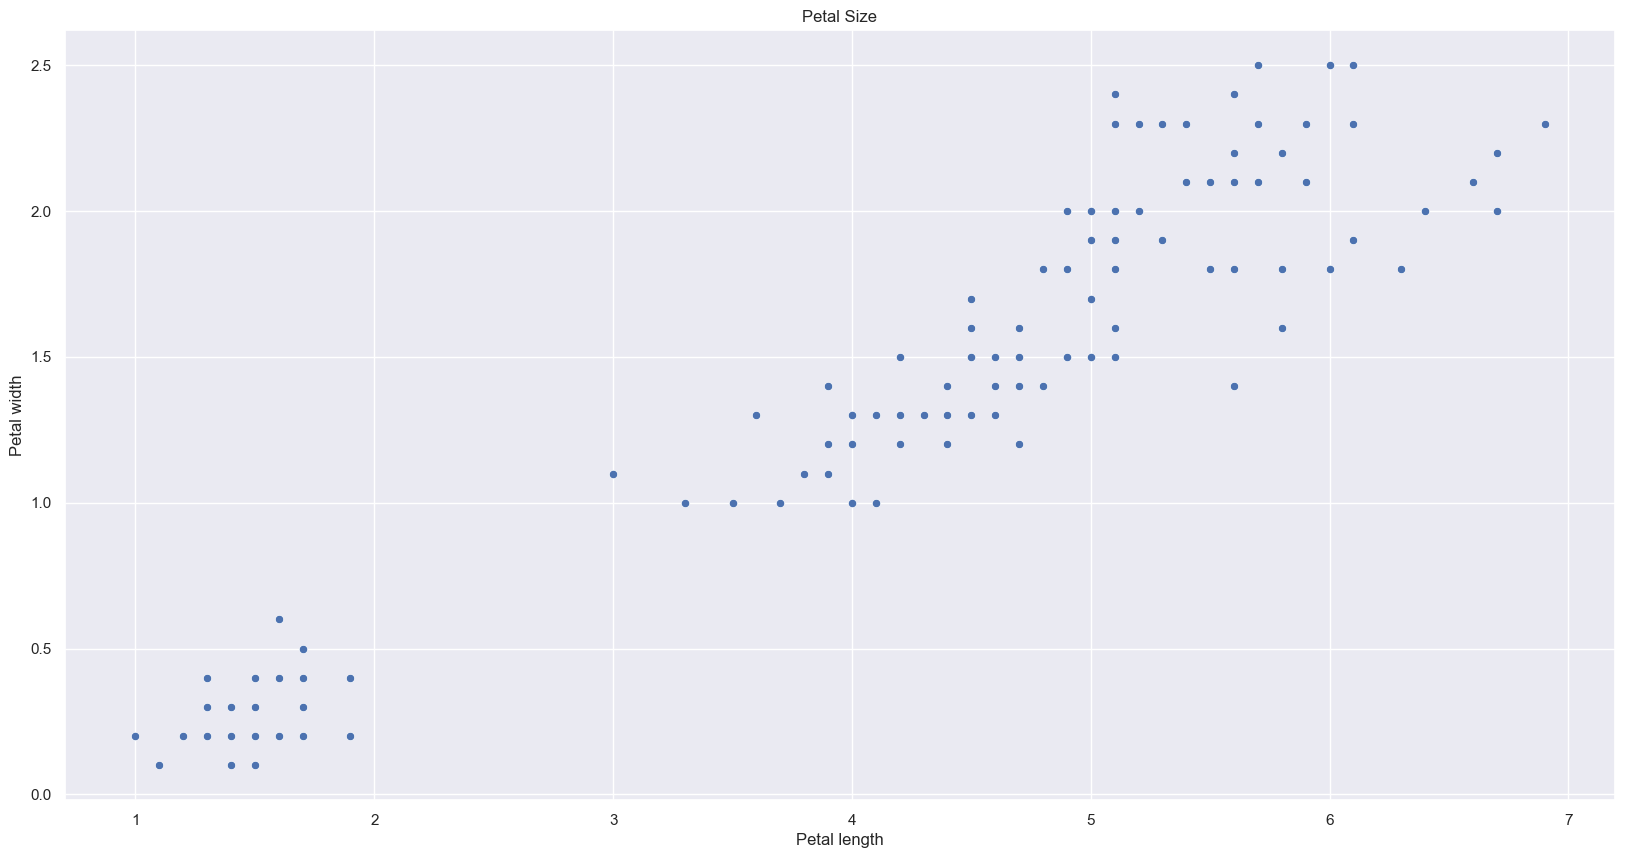

In [18]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

query = "SELECT petal_length, petal_width FROM iris ORDER BY petal_length ASC"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.scatterplot(data=df, x='petal_length', y='petal_width')
plt.title("Petal Size")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

cursor.close()
conn.close()

Ex2: Dos variables Numéricas

Se van a graficar *petal_length, petal_width*. Es decir que se va a analizar el tamaño de los petalos analizando los datos las dos variables que tenemos sobre este elemento. Se ha utilizado u scatterplot, esto nos situa el tamaño del petalo de cada flor individual en un plano, los valores a la derecha y arriba representan los pétalos mas grandes y viceversa. Con este gráfico se puede ver la relación que existe entre las dos variables, y el signo de esta, es decir si cuando una crece tambien lo hace la otra o viceversa. A primera vista se pude ver que existe una correlación positiva entre las variables *petal_length, petal_width*.

EX3

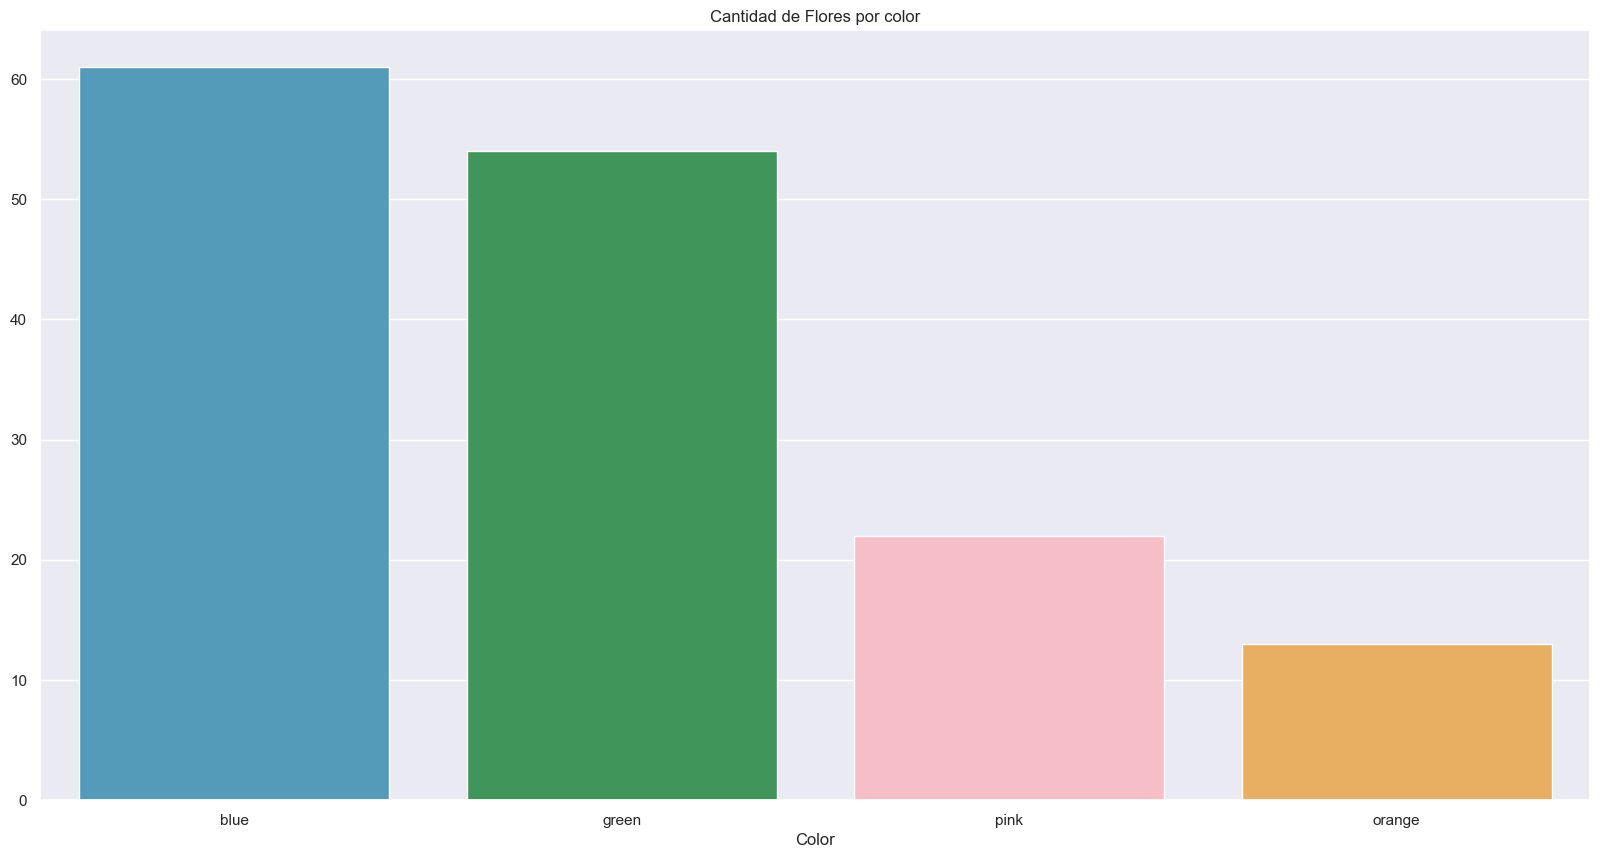

In [17]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

query = "SELECT COUNT(color), color FROM iris GROUP BY color ORDER BY COUNT(color) DESC"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

custom_palette = {'blue': '#43a2ca', 'pink': '#ffb6c1', 'orange': '#feb24c', 'green': '#31a354'}

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.barplot(data=df, x='color', y='COUNT(color)', hue='color', palette=custom_palette)
plt.title("Cantidad de Flores por color")
plt.xlabel("Color")
plt.ylabel("")
plt.show()

cursor.close()
conn.close()

Ex3: Una variable Categórica.

Se va a graficar un garfico de barras con el *color* y el count de cuantas flores de cada color existen. Se puede ver que hay dos colores que destacan, esto es debido a que a la hora de hacer la columna de colores se ha hecho a partir de el tamaño de los sepalos, de esta manera se puede deducir que los colores azul y verde son mas prevalientes porque se asocian a tamaños mas intermedios y probablemente mas prevalientes, mientras que los colores naranja y rosa se asocian a valores mas extremos en la base de datos que no se dan tan amenudo en la naturaleza.

EX4

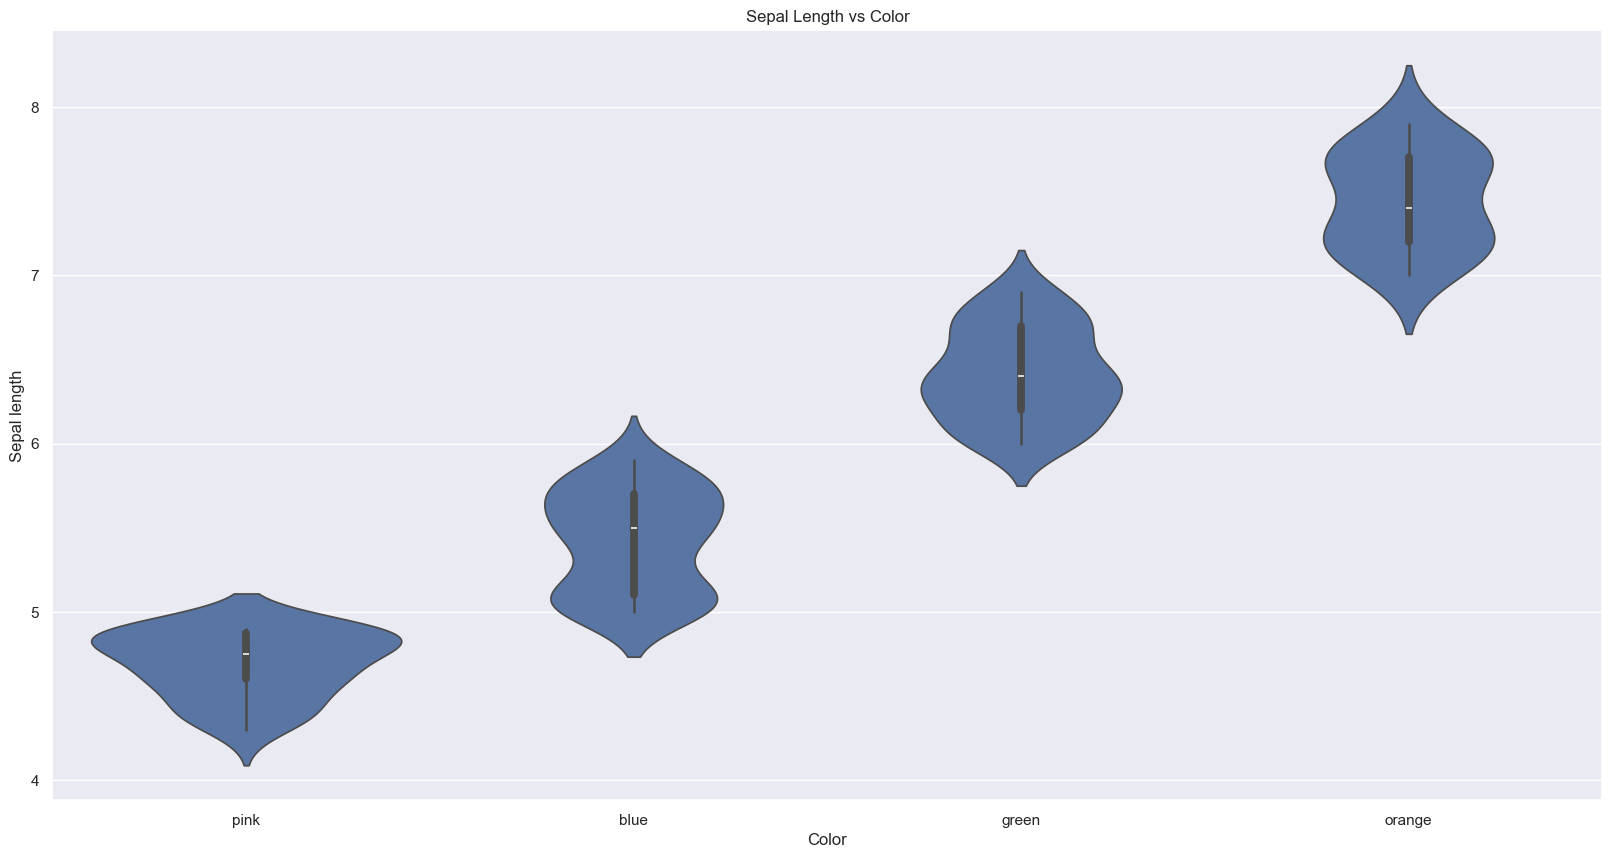

In [39]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

query = "SELECT sepal_length, color FROM iris ORDER BY sepal_length ASC"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.violinplot(data=df, x='color', y='sepal_length')
plt.title("Sepal Length vs Color")
plt.xlabel("Color")
plt.ylabel("Sepal length")
plt.show()

cursor.close()
conn.close()

Ex4: Una variable Categórica y una Numérica

Se grafica *sepal_length* y color de la flor. Se ha elegido un violin plot, este plot muestra la distribución de los datos en cada categoria. Además en el interior de esta distribución se muestra la media y los quartiles.
Es un gráfico muy util para valorar la distribución de una variable en las diferentes categorias del gráfico. En este caso se pueden extraer un par de conculusiones:

1. El spread de la variable *sepal_length* es bastante uniforme segun el color en el sentido que cada color ocupa aproximadamente un range similar de *sepal_length*. Esto no es casualidad ya que la columna *color* se ha creado a partir de *sepal_length*.
2. El area de los violines nos permite saber que tipo de distribución tiene la variable *sepal_length*, en el color green y pink se da una distribución mas bien normal (aunque en pink los datos estan un poco skewed hacia valores mas altos), mientras que en blue y orange aunque la media se encuentre mas bien en el medio la moda seguramente estaria mas cercana a uno de los extremos ya que ambas distribuciones tienen formas de guitarra, con lo valores mas abundantes a izquierda y derecha del valor medio de la muestra.
3. Con el gráfico anterior hemos deduciudo que los colores azul y verde pertenecen a valores intermedios de tamaño, mientras que los colores rosa y naranja pertenecen a tamaños mas extremos. Con este gráfico corroboramos este hecho, además vemos que el color naranja pertenece a flores de mayor tamaño, mientras que el rosa pertenece a flores de menor tamaño. Obviamente en este caso el color es inventado, pero si suponemos por un momento que esto fueran datos reales podriamos estar estableciendo una valiosa correlación a nivel botánico entre tamaño y color de flores de esta especie.

EX5

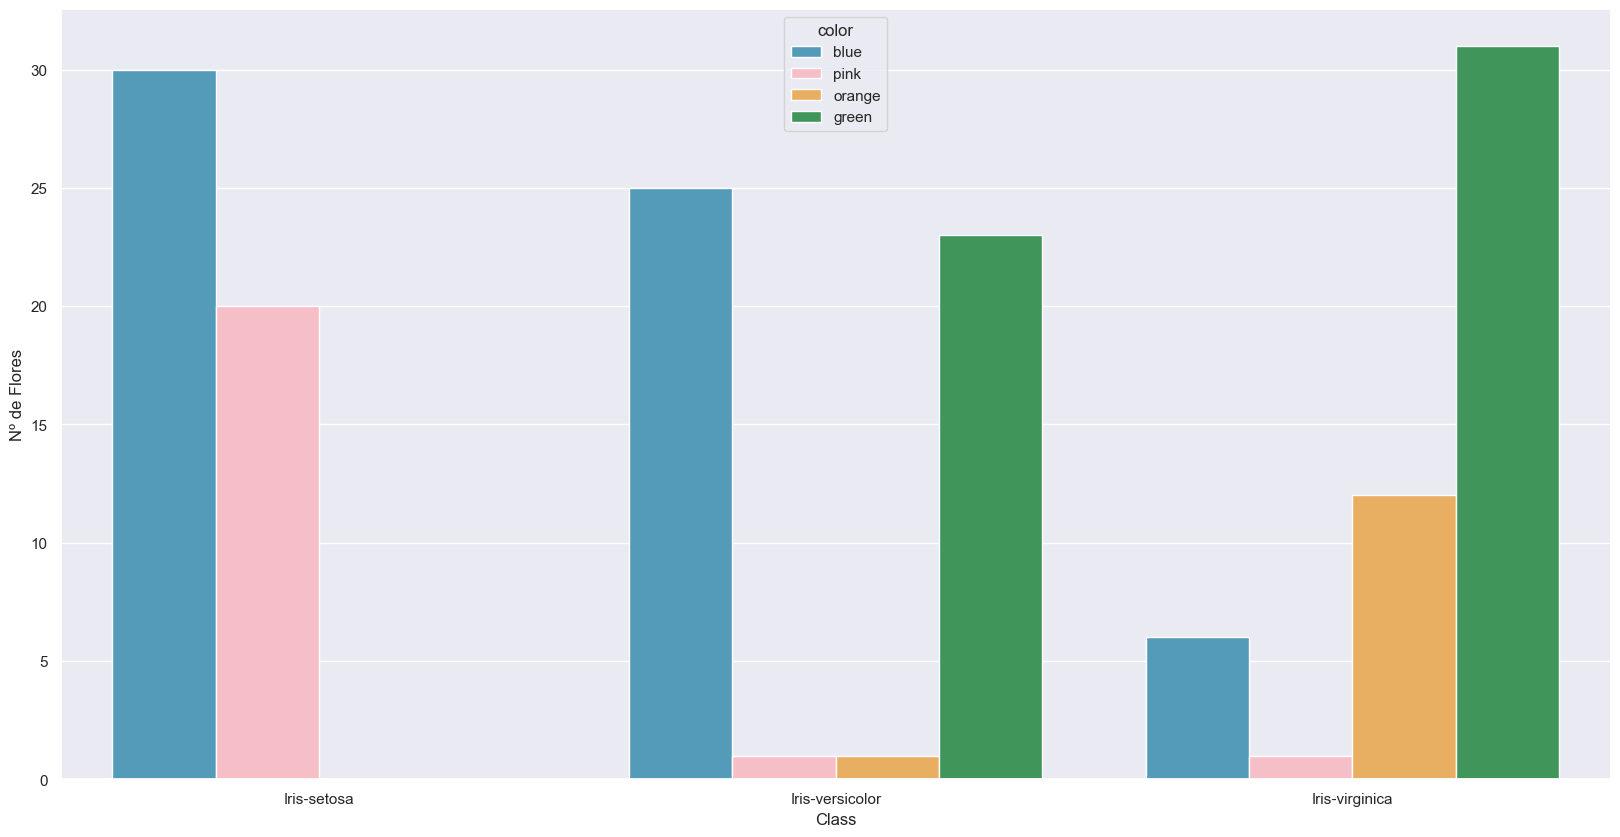

In [38]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

query = "SELECT COUNT(class), color, class FROM iris GROUP BY color, class"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

#Se ha creado una custom palette porque lo que se esta representado son colores y se se representa el blue con un color diferente quedaria poco claro.
custom_palette = {'blue': '#43a2ca', 'pink': '#ffb6c1', 'orange': '#feb24c', 'green': '#31a354'}

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.barplot(data=df, x='class', y='COUNT(class)', hue='color', palette=custom_palette,)#Se establece que el palette se el que hemos creado.
plt.title("")
plt.xlabel("Class")
plt.ylabel("Nº de Flores")
plt.show()

cursor.close()
conn.close()

Ex5: Dos varaibles Categóricas

Se van a comparar el count de flores en funcion de la clase de flor y de su color. Se hara con un diagrama de barras, de esta manera se pueden comparar los colores mas abundantes en cada clase de flor.
Mediante los gráficos que hemos realizado hasta este momento hemos podido deducir que los colores azul y verde pertenecen a valores intermedios de tamaño, mientras que los colores rosa y naranja pertenecen a tamaños mas extremos, para ser mas concretos el color rosa es para flores mas pequeñas mientras que el color naranja es para flores de mayor tamaño. Con este gráfico ahora sabemos que la variedad Setosa es la mas pequeña mientras que la variedad Virginica es la mas grande, siendo la variedad Versicolor la intermedia.

EX6

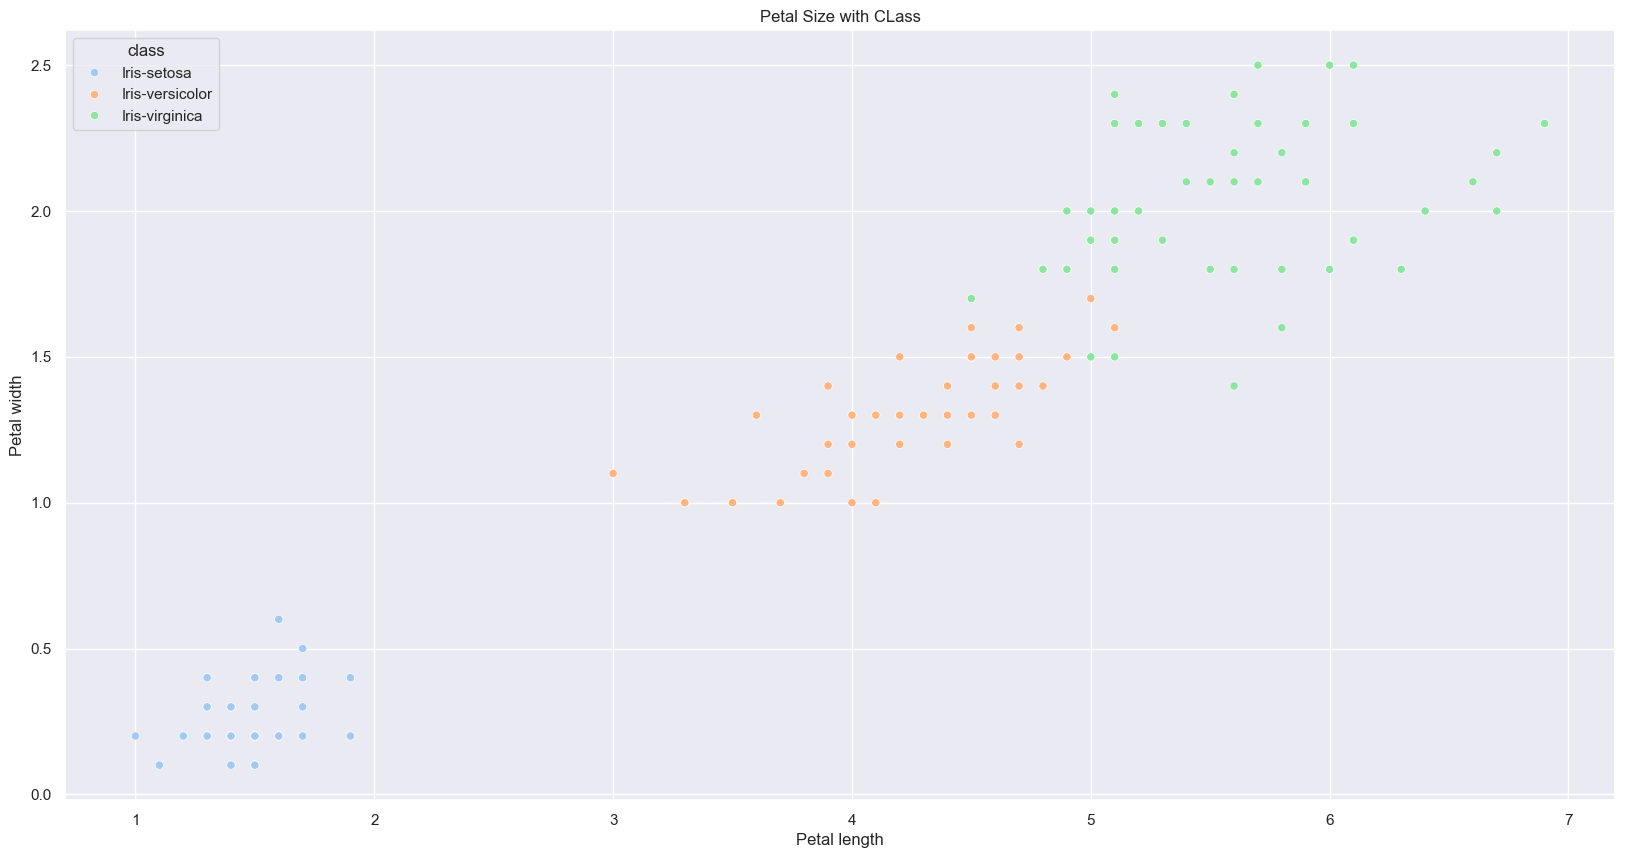

In [21]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

query = "SELECT petal_length, petal_width, class FROM iris ORDER BY petal_length ASC"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='class', palette='pastel')
plt.title("Petal Size with Class")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

cursor.close()
conn.close()

Ex6: Tres Variables (2 Numéricas 1 Categórica)

Se ha utilizad un scatterplot ya que visualmente nos dara una imagen clara de donde se reparten cada tipo de flor en función del tamaño de sus pétalos.
Este gráfico nos confirma lo que havíamos visto con los colores de la flor, y es que la variedad Setosa es la mas pequeña, la Versicolor es la mediana y la Virginica es la grande.
Además nos presenta un poco de información adicional: el hecho de la variedad Setosa es bastante mas pequeñaque las otras dos. Este es un dato que desde el punto de vista evolutivo podría ser relevante, ya que podría significar que las variedades Virginica y Versicolor estan mas relacionadas, quizas porque han crecido en ambientes mas similares, cosa que tambien podría explicar la correlación de los colores con el tamaño de las flores (si ignoramos el hecho de que me los he inventado yo).

EX7

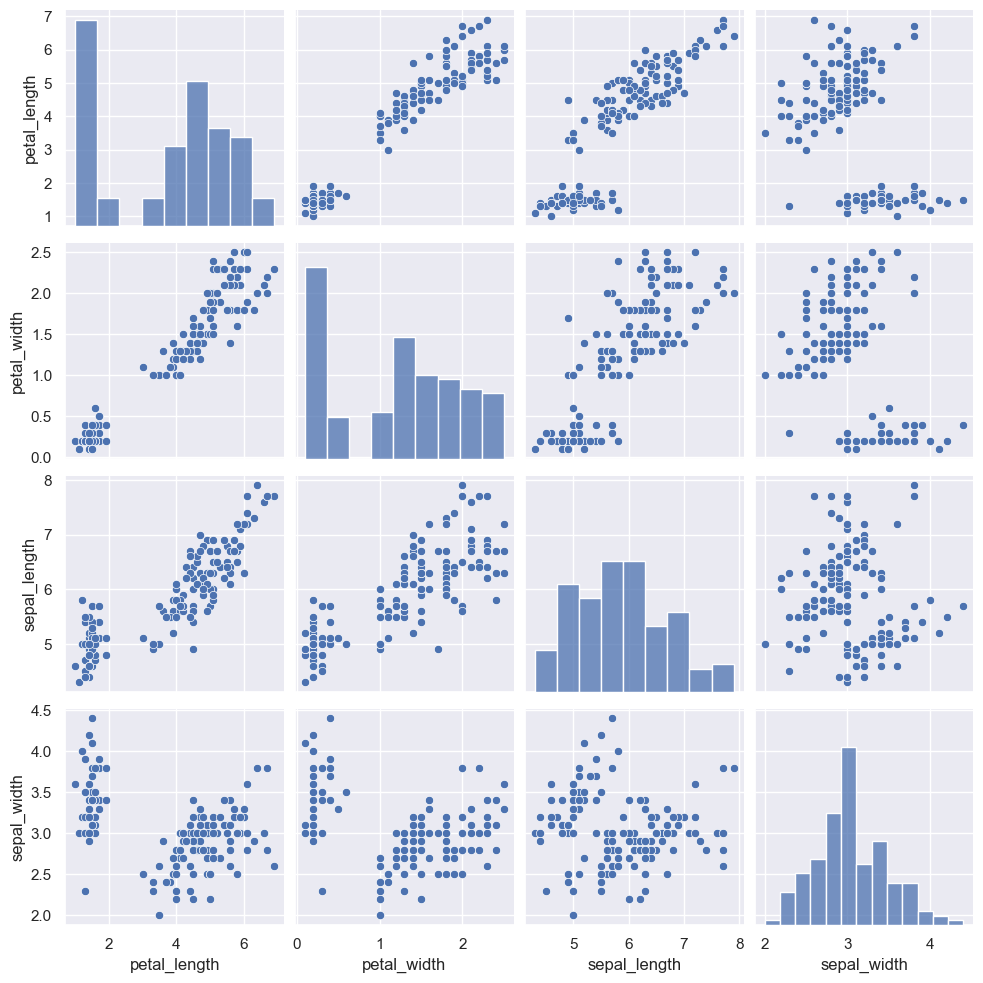

In [7]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

query = "SELECT petal_length, petal_width, sepal_length, sepal_width FROM iris"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.pairplot(data=df)
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

cursor.close()
conn.close()

Ex7: Pairplot

Un pairplot (o scatterplot matrix) es una matriz que muestra la relación entre diversas variables númericas a la vez, admeás de la distribución de estas mediante histogramas.

A primera vista se observa que mas o menos existe una correlación postivia entre todas las variables de tamaño, es decir como mas grande una de las variables mas grande la flor en genreal y por lo tanto mas grandes las otras.
Si que se puede observar un grupo un poco diferente cuando se relacionan los tamaño de sepalo y petalo, intuitivamente podemos suponer que alguna de las flores (mirando los datos la mas pequeña, la variedad Setosa) tiene unas proporciones un poco diferentes, y que el tamaño mas grande de su sepalo no se relaciona necesariamente con un tamaño mayor de pétalo. Intentaremos corroborar esta suposicion mas adelante analizando los datos de forma mas detallada.

Analizando los histogrmas de distribución observamos dos cosas.

1. Los tamaños de Sépalo presentan distribuciones mas bien normal.
2. Los tamaños de Pétalo tienen muchos valores pequeños, aunque el resto de los datos presenta una ditribución tambien mas bien normal.

#### **NIVEL 2**

EX1

Correlation Matrix:
              petal_length  petal_width  sepal_length  sepal_width
petal_length      1.000000     0.962757      0.871754    -0.420516
petal_width       0.962757     1.000000      0.817954    -0.356544
sepal_length      0.871754     0.817954      1.000000    -0.109369
sepal_width      -0.420516    -0.356544     -0.109369     1.000000



<Axes: >

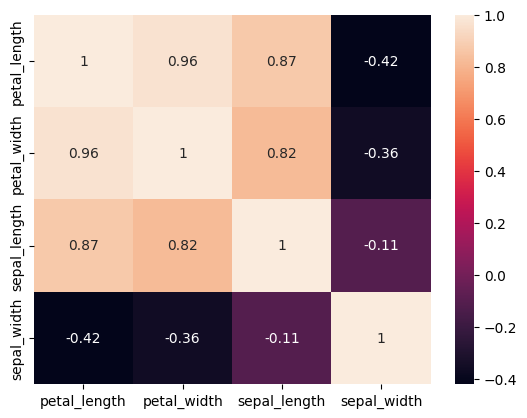

In [10]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress #Importaremos lineregress de scipy que viene con numpy.

conn = mysql.connector.connect(host='localhost',
                                database='iris_dataset',
                                user='root',
                                password='Peanuts@1991'
)

query = "SELECT petal_length, petal_width, sepal_length, sepal_width FROM iris"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

conn.close()

correlation_matrix = df.corr() #Utilizamos la fromula .corr() para extraer las correlaciones entre los datos.

print("Correlation Matrix:")
print(correlation_matrix)
print()

sns.heatmap(df.corr(), annot=True)

Slope: 0.4164191322854009
Intercept: -0.3665140452167266
R-squared: 0.926901227922003
P-value: 5.776660988498995e-86
Standard error: 0.009612539319328631


Text(0, 0.5, 'Petal Width')

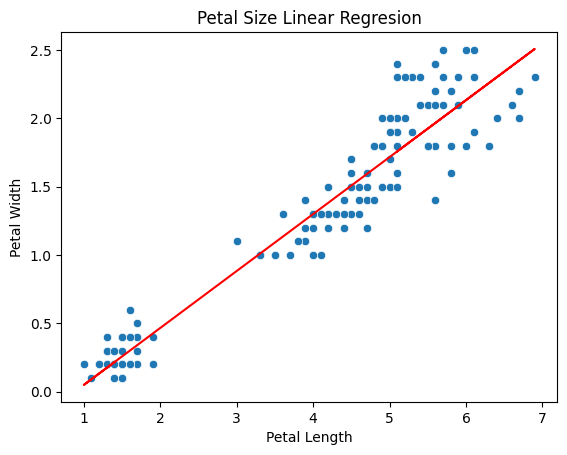

In [11]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress #Importaremos lineregress de scipy que viene con numpy.

conn = mysql.connector.connect(host='localhost',
                                database='iris_dataset',
                                user='root',
                                password='Peanuts@1991'
)

query = "SELECT petal_length, petal_width, sepal_length, sepal_width FROM iris"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

conn.close()

x_value_lr = df['petal_length']
y_value_lr = df['petal_width']

slope, intercept, r_value, p_value, std_err = linregress(x_value_lr, y_value_lr) #Utilitzamos lineregress.

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(data=df, x='petal_length', y='petal_width')
plt.plot(x_value_lr, slope*x_value_lr+intercept, color='red', label='Linear Regression') #Pintamos la linea de regression lineal, donde x = petal length e y = m*x + b (m = slope y b = intercept)
plt.title("Petal Size Linear Regresion")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Ex1: Correlación y Regressión lineal

1. Matriz de Correlación:

La matriz de correlación nos indica si dos variables tienen una fuerte correlación o ninguna en absoluto. El valor va de -1 a 1. Como mas cerca estamos de -1 o 1 mas fuerte es la correlación (positiva o negativa), es decir mas varia una variable cuando cambia la otra, en cambio si el valor se acerca a 0 queire decir que no existe relación entre las varaibles y que cuando varia una la otra no varia demasiado o en absoluto.

Analizando el resultado de nuestra matriz de correlación destacamos que existe una fuerte correlacion postitva entre el tamaño del *petal_length, petal_width y sepal length*, mientras que, cosa que se havia intuido en el pairplot de forma visual, la variable *sepal_width* no tiene demasiadoa influencia en la longitud del Sépalo, pero si un poco mas en el tamaño del pétalo, ya que como mas ancho el Sépalo mas pequeño el pétalo en general.
Aprofundiremos en este hecho mas adelante con una visualización.

2. Regressión lineal

Se ha realizado una regressión lineal de las variables *petal_length, petal_width* para profundizar un poco mas en los datos.

- Slope: muestra el cambio de la variable y en funcion de el cambio unitario de la variable x. En nuestro caso 0.41, es decir que aumenta.

- Intecept: El valor de y cuando x = 0. En nuestro caso es negativo así que sabemos que la longitud del petalo es mayor que la anchura en general.

- r**2: Indica la proporción de la variación de y que es debida a la variación de x. En nuestro caso un 92%, así que son variables muy correlacionadas.

- P-Value: Indica si la correlación es fuerte, con valores inferiores a 0.05 se considera fuerte, en nuestro caso es muy inferior así que es muy fuerte.

- Stasndard error: Un standard error bajo (como en nuestro caso) indica una alta precisión de los coeficientes.

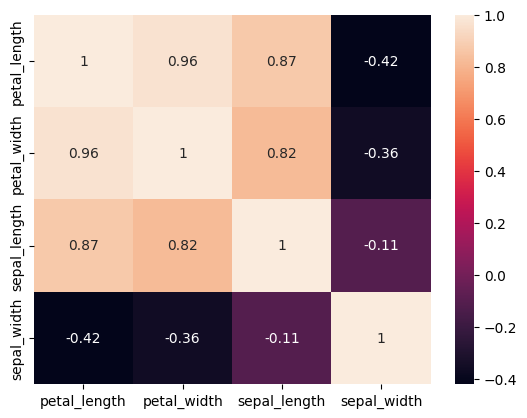

In [5]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress #Importaremos lineregress de scipy que viene con numpy.

conn = mysql.connector.connect(host='localhost',
                                database='iris_dataset',
                                user='root',
                                password='Peanuts@1991'
)

query = "SELECT petal_length, petal_width, sepal_length, sepal_width FROM iris"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

conn.close()

ax = sns.heatmap(df.corr(), annot=True)

EX2

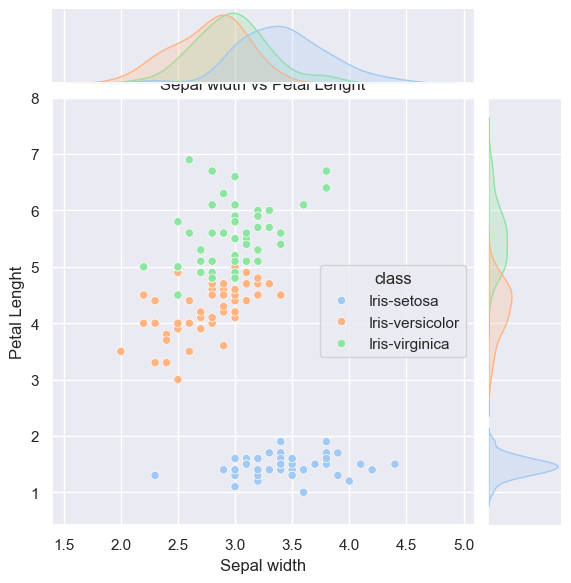

In [37]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conn = mysql.connector.connect(host='localhost',
                                         database='iris_dataset',
                                         user='root',
                                         password='Peanuts@1991')

query = "SELECT sepal_width, petal_length, class FROM iris"
cursor = conn.cursor()
cursor.execute(query)

data = cursor.fetchall()
columns = [i[0] for i in cursor.description]
df = pd.DataFrame(data, columns=columns)

sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.jointplot(data=df, x='sepal_width', y='petal_length', hue='class', palette='pastel')
plt.title("Sepal width vs Petal Lenght")
plt.xlabel("Sepal width")
plt.ylabel("Petal Lenght")
plt.show()

cursor.close()
conn.close()

Ex2: JointPlot

El jointplot nos permite visualizar con un scatterplot la distribución d ciertas variables, combinando este con distribuciones de densidad y colores podemos comparar y analizar hasta 3 variables.

En nuestro caso vamos a analizar la relación que nos llamava la atencion en el PairPlot y en la matriza de correlación, *sepal_width* con *petal_length*.

Con el codigo de colores segun la variedad de flor vemos de forma rápida que la variedad Setosa es la que no presenta una relación lineal positiva entre el ancho de su sepalo y del resto de los elementos. Vemos que grandes anchos de Sépalo no se corresponden con tamaños de pétalo grandes (podemos hablar de tamaño de pétalo y no solo de longitud porque sabemos que existe una correlacíon positiva fuerte entre longitud y ancho de pétalo, y portanto si uno es grande también lo es el otro). Vemos que, mientras que la distribución de los tamaños de pétalo en las variedades Versicolor y Virginica es uniforme y ocupa rangos grandes, en la variedad pequeña, la Setosa, los tamaños de pétalo se concentran en un rango mucho mas pequeño, y presnetan menos variedad.

De nuevo esto podrien resultar datos importantes a nivel evolutivo. En las flores los Sépalos envuelven a las otras piezas florales en las primeras fases de desarrollo, cuando la flor es sólo un capullo o pimpollo. También evitan, que los insectos accedan al néctar sin pasar por los estambres y estigmas. Esto significa que la variedad Setosa a crecido en ambientes donde un Sépalo mas grande era aventajoso por razones de fauna, climaticas o ambientales en general.

Sea lo que fuere esta visualización nos ha permitido clasificar de forma no trivial las variedades florales estudiadas en funcion de el tamaño de sus partes, y distinguir así patrones y difernecias entre las mismas.

#### **NIVEL 3**

EX1

C:\Users\PC Home\AppData\Local\Temp\ipykernel_7368\4233360261.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


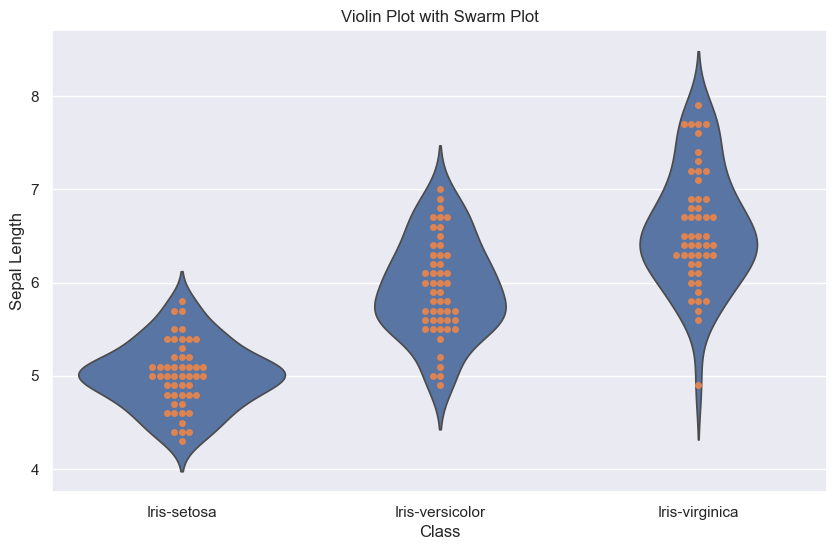

In [36]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = mysql.connector.connect(host='localhost',
                                database='iris_dataset',
                                user='root',
                                password='Peanuts@1991')

query = "SELECT sepal_length, class FROM iris"
df = pd.read_sql_query(query, conn)

conn.close()

plt.figure(figsize=(10, 6))

sns.violinplot(data=df, x='class', y='sepal_length', inner=None)

sns.swarmplot(data=df, x='class', y='sepal_length')

plt.title("Violin Plot with Swarm Plot")
plt.xlabel("Class")
plt.ylabel("Sepal Length")
plt.show()

Ex1: ViolinPlot with SwarmPlot

En este gráfico obsrevamos las dirtibuciones de la longitud del Sépalo categorizadas por clase y enseñando los data points individuales en cada violín.

Vemos que mas o menos todos los violines presentan una ditribución normal.

La variedad Virginica presenta un valor extremo en su parte inferior.

EX2

C:\Users\PC Home\AppData\Local\Temp\ipykernel_7368\1279431916.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


<Figure size 1000x600 with 0 Axes>

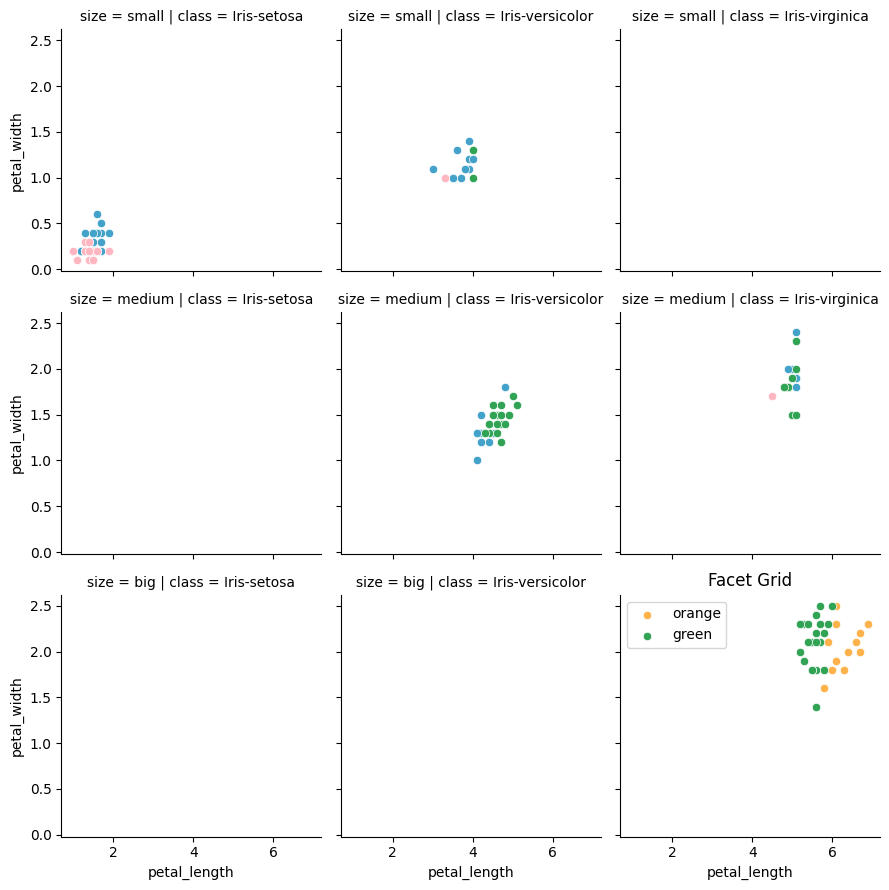

In [9]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = mysql.connector.connect(host='localhost',
                                database='iris_dataset',
                                user='root',
                                password='Peanuts@1991')

query = "SELECT petal_length, petal_width, class, color, size FROM iris"
df = pd.read_sql_query(query, conn)

conn.close()

plt.figure(figsize=(10, 6))

custom_palette = {'blue': '#43a2ca', 'pink': '#ffb6c1', 'orange': '#feb24c', 'green': '#31a354'}

g = sns.FacetGrid(df, col="class", row='size', hue="color", palette=custom_palette)
g.map(sns.scatterplot, "petal_length", "petal_width")

plt.title('Facet Grid')
plt.xlabel('Petal Lenght')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

Ex2: Facet Grid

El FacetGRid permite classificar 2 variables (longitud y ancho de pétalo) en funcion de diversas categorias, en este caso 3 categorias (color, size y class).

Las columnas seran las variedades de flor mientras que las filas seran el tamaño, y el color sera representado por el color de los datapints en los scaterplots.

Se ve muy bien a primera vista que variedades de flor son mas grandes o pequeñas y que colores toman estas variedades y, de este modo, la relación que existe entre color y tamaño.
También se aprecia que colores son los mas prevalentes.

### Conclusiones

Con este estudio de los tamaños de las flores hemos podido extraer las siguientes conclusiones:

1. Los tamaños varian en funcion de la variedad de flor. Hay variedades que suelen ser mas grandes que otras.
2. El color es un rasgo evolutivo, y algunos colores son mas prevalentes en ciertas variedades que en otras. No podemos concluir si existe una relación causal entre tamaño y color, pero si una correlación.
3. La correlación entre los tamaños de las partes de las flores suele ser positiva y bastanate fuerte entre partes y en todas las variedades excepto en una variedad concreta de flor, donde el ancho del Sépalo presenta una correlación negativa con el resto de partes.
4. Existen dos variedades muy parecidas que comparten fuertes relaciones positivas en todas sus variables, por lo que podemos intuir que se han desarrolado en ambientes parecidos, mientras que la tercera variedad mas pequeña no presenta las mismas caracteristicas ni correlaxiones, de modo que odria ser que se hubiera desarrollado en un ambibiente diferente.